# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Raffa Reyhan
- **Email:** raffareyhan7@gmail.com
- **ID Dicoding:** raffa_reyhan

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan performa penyewaan sepeda oleh perusahaan pada tahun 2011 dan 2012 ? Apakah mengalami peningkatan atau penurunan ?
- Kapan jumlah penyewaan sepeda mencapai nilai tertinggi dan terendah jika diukur berdasarkan jam ?
- Bagaimana persebaran pelanggan yang menyewa sepeda berdasarkan musim ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [2]:
#!pip install streamlit

## Data Wrangling

### Gathering Data

Pada tahap ini, kita akan mengumpulkan semua data yang dibutuhkan

In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika diperhatikan, jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kedua kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada day_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

Karena Kedua dataset tersebut tidak memiliki missing values dan tidak ada duplicated data, maka tidak perlu dilakukan cleansing data.

## Exploratory Data Analysis (EDA)

### Explore  `day_df`

In [10]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
178,179,2011-06-28,3,0,6,0,2,1,1,0.744167,0.692558,0.634167,0.144283,732,3916,4648
146,147,2011-05-27,2,0,5,0,5,1,1,0.681667,0.637008,0.653750,0.240679,871,3808,4679
348,349,2011-12-15,4,0,12,0,4,1,2,0.422500,0.412237,0.634167,0.268042,181,3528,3709
311,312,2011-11-08,4,0,11,0,2,1,1,0.408333,0.412246,0.721667,0.069038,376,3829,4205
659,660,2012-10-21,4,1,10,0,0,0,1,0.464167,0.456429,0.510000,0.166054,2132,4692,6824


In [11]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [12]:
# Banyaknya sepeda yang disewa berdasarkan bulan
day_mnth = pd.DataFrame(day_df.groupby(by="mnth").cnt.sum()).reset_index()
day_mnth["mnth"] = day_mnth["mnth"].replace({1: 'January',
                                             2: 'February',
                                             3: 'March',
                                             4: 'April',
                                             5: 'May',
                                             6: 'June',
                                             7: 'July',
                                             8: 'August',
                                             9: 'September',
                                            10: 'October',
                                            11: 'November',
                                            12: 'December'})

#df1 = pd.DataFrame(day_mnth)
day_mnth

,mnth,cnt
0,January,134933
1,February,151352
2,March,228920
3,April,269094
4,May,331686
5,June,346342
6,July,344948
7,August,351194
8,September,345991
9,October,322352


In [13]:
# Banyaknya sepeda yang disewa berdasarkan musim
day_season = pd.DataFrame(day_df.groupby(by="season").cnt.sum().reset_index())
day_season["season"] = day_season["season"].replace({1: 'Summer',
                                             2: 'Springer',
                                             3: 'Fall',
                                             4: 'Winter'})
day_season

,season,cnt
0,Summer,471348
1,Springer,918589
2,Fall,1061129
3,Winter,841613


In [14]:
# Persebaran banyaknya penyewaan sepeda per bulan berdasarkan rata-rata kelembaban udara dan rata-rata sepeda yang disewa per bulan nya
day_hum = day_df.groupby(by="mnth").agg({"hum":"mean","cnt":"mean"}).reset_index()
day_hum["mnth"] = day_hum["mnth"].replace({1: 'January',
                                             2: 'February',
                                             3: 'March',
                                             4: 'April',
                                             5: 'May',
                                             6: 'June',
                                             7: 'July',
                                             8: 'August',
                                             9: 'September',
                                            10: 'October',
                                            11: 'November',
                                            12: 'December'})
day_hum

,mnth,hum,cnt
0,January,0.585828,2176.338710
1,February,0.567465,2655.298246
2,March,0.588475,3692.258065
3,April,0.588063,4484.900000
4,May,0.688958,5349.774194
5,June,0.575806,5772.366667
6,July,0.597876,5563.677419
7,August,0.637730,5664.419355
8,September,0.714714,5766.516667
9,October,0.693761,5199.225806


### Explore  `hour_df`

In [15]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13682,13683,2012-07-29,3,1,7,7,0,0,0,1,0.66,0.6212,0.69,0.2537,4,36,40
16719,16720,2012-12-04,4,1,12,10,0,2,1,1,0.46,0.4545,0.82,0.1940,26,130,156
10872,10873,2012-04-03,2,1,4,4,0,2,1,1,0.32,0.3333,0.66,0.0896,0,1,1
6871,6872,2011-10-18,4,0,10,21,0,2,1,2,0.54,0.5152,0.68,0.1343,28,178,206
573,574,2011-01-26,1,0,1,2,0,3,1,3,0.22,0.2273,0.69,0.1940,3,7,10


In [16]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [17]:
hour_df.groupby(by="hr").agg({"cnt":["sum", "mean", "min", "max", "std"]})

cnt                                 
       sum        mean min  max         std
hr                                         
0    39130   53.898072   2  283   42.307910
1    24164   33.375691   1  168   33.538727
2    16352   22.869930   1  132   26.578642
3     8174   11.727403   1   79   13.239190
4     4428    6.352941   1   28    4.143818
5    14261   19.889819   1   66   13.200765
6    55132   76.044138   1  213   55.084348
7   154171  212.064649   1  596  161.441936
8   261001  359.011004   5  839  235.189285
9   159438  219.309491  14  426   93.703458
10  126257  173.668501   8  539  102.205413
11  151320  208.143054  10  663  127.495536
12  184414  253.315934   3  776  145.081134
13  184919  253.661180  11  760  148.107657
14  175652  240.949246  12  750  147.271574
15  183149  251.233196   7  750  144.632541
16  227748  311.983562  11  783  148.682618
17  336860  461.452055  15  976  232.656611
18  309772  425.510989  23  977  224.639304
19  226789  311.523352  11  743  161.050359
20  164550  226.030220  11  567  119.670164
21  125445  172.314560   6  584   89.788893
22   95612  131.335165   9  502   69.937782
23   63941   87.831044   2  256   50.846889

In [18]:
hour_hum = hour_df.groupby(by="mnth").agg({"hum":"mean","cnt":"mean"}).reset_index()
hour_hum

,mnth,hum,cnt
0,1,0.580931,94.424773
1,2,0.567211,112.865026
2,3,0.589050,155.410726
3,4,0.588114,187.260960
4,5,0.688958,222.907258
5,6,0.575806,240.515278
6,7,0.597876,231.819892
7,8,0.637227,238.097627
8,9,0.714454,240.773138
9,10,0.689490,222.158511


In [19]:
hour_df.groupby(by="weathersit").agg({"cnt":["mean", "min", "max", "std"]})

cnt                     
                  mean min  max         std
weathersit                                 
1           204.869272   1  977  189.487773
2           175.165493   1  957  165.431589
3           111.579281   1  891  133.781045
4            74.333333  23  164   77.925178

Perhatikan pada kolom weathersit, disitu tertulis dalam angka (int). Angka tersebut merepresentasikan masing-masing keadaan cuaca berikut ini:

1.  Clear, Few clouds, Partly cloudy
2.  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3.  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.
4.  Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



In [20]:
weather_sit_df = hour_df.groupby("weathersit").cnt.sum().sort_values(ascending=False).reset_index()
weather_sit_df

,weathersit,cnt
0,1,2338173
1,2,795952
2,3,158331
3,4,223


In [21]:
hour_mnth = pd.DataFrame(hour_df.groupby(by=["mnth", "weathersit"]).agg({"cnt": "sum"}))
month_names = {1: 'January',
               2: 'February',
               3: 'March',
               4: 'April',
               5: 'May',
               6: 'June',
               7: 'July',
               8: 'August',
               9: 'September',
               10: 'October',
               11: 'November',
               12: 'December'}
hour_mnth.index.set_levels(hour_mnth.index.levels[0].map(month_names), level=0, inplace=True)
hour_mnth

<ipython-input-21-bcd99046d4e1>:14: FutureWarning: inplace is deprecated and will be removed in a future version.
  hour_mnth.index.set_levels(hour_mnth.index.levels[0].map(month_names), level=0, inplace=True)


cnt
mnth      weathersit        
January   1            92726
          2            36634
          3             5350
          4              223
February  1           105618
          2            35414
          3            10320
March     1           156094
          2            62902
          3             9924
April     1           201563
          2            55301
          3            12230
May       1           233001
          2            78914
          3            19771
June      1           274190
          2            61457
          3            10695
July      1           275693
          2            57146
          3            12109
August    1           258351
          2            75262
          3            17581
September 1           239042
          2            87113
          3            19836
October   1           204467
          2            95330
          3            22555
November  1           176571
          2            68828
          3             9432
December  1           120857
          2            81651
          3             8528

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Pertama-tama ambil dataset pada tahun 2011

In [22]:
day_df1 = day_df.iloc[:365]
year2021_df = pd.DataFrame(day_df1.groupby("mnth").cnt.sum().reset_index())
year2021_df['mnth'] = year2021_df['mnth'].replace({1: 'January',
                                                   2: 'February',
                                                   3: 'March',
                                                   4: 'April',
                                                   5: 'May',
                                                   6: 'June',
                                                   7: 'July',
                                                   8: 'August',
                                                   9: 'September',
                                                   10: 'October',
                                                   11: 'November',
                                                   12: 'December'})
year2021_df

,mnth,cnt
0,January,38189
1,February,48215
2,March,64045
3,April,94870
4,May,135821
5,June,143512
6,July,141341
7,August,136691
8,September,127418
9,October,123511


Selanjutnya ambil dataset pada tahun 2012

In [23]:
day_df2 = day_df.iloc[365:]
year2022_df = pd.DataFrame(day_df2.groupby("mnth").cnt.sum().reset_index())
year2022_df['mnth'] = year2021_df['mnth'].replace({1: 'January',
                                                   2: 'February',
                                                   3: 'March',
                                                   4: 'April',
                                                   5: 'May',
                                                   6: 'June',
                                                   7: 'July',
                                                   8: 'August',
                                                   9: 'September',
                                                   10: 'October',
                                                   11: 'November',
                                                   12: 'December'})
year2022_df

,mnth,cnt
0,January,96744
1,February,103137
2,March,164875
3,April,174224
4,May,195865
5,June,202830
6,July,203607
7,August,214503
8,September,218573
9,October,198841


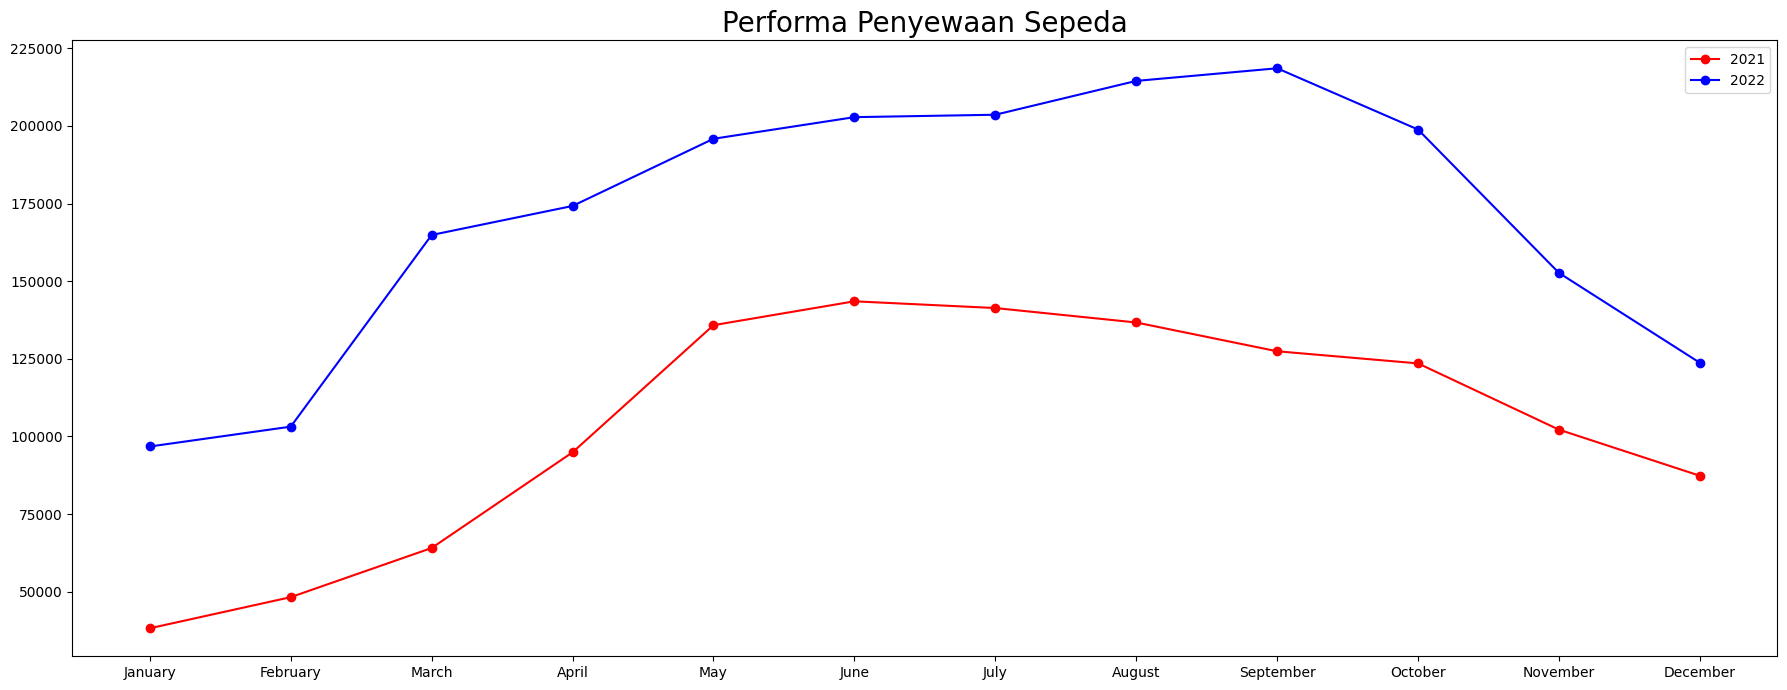

In [24]:
plt.figure(figsize=(22, 8))
plt.plot(year2021_df['mnth'], year2021_df['cnt'], label='2021', marker = 'o', color='red')
plt.plot(year2022_df['mnth'], year2022_df['cnt'], label='2022', marker = 'o', color='blue')
plt.title('Performa Penyewaan Sepeda', size=20)
plt.legend()
plt.show()

Berdasarkan gambar di atas, terlihat bahwa terdapat kenaikan yang signifikan dari bisnis penyewaan sepeda dari tahun 2011 ke tahun 2012

### Pertanyaan 2:

In [25]:
hours1_df = hour_df.groupby("hr").cnt.sum().sort_values(ascending=False).reset_index()
hours1_df["hr"] = hours1_df['hr'].astype('str')
hours1_df

,hr,cnt
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


<ipython-input-26-41a8f7e29dc8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="hr", data=hours1_df.head(12), orient='h', palette=colors, ax=ax[0])
<ipython-input-26-41a8f7e29dc8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="hr", data=hours1_df.sort_values(by="cnt",ascending=True).head(12), orient='h', palette=colors, ax=ax[1])


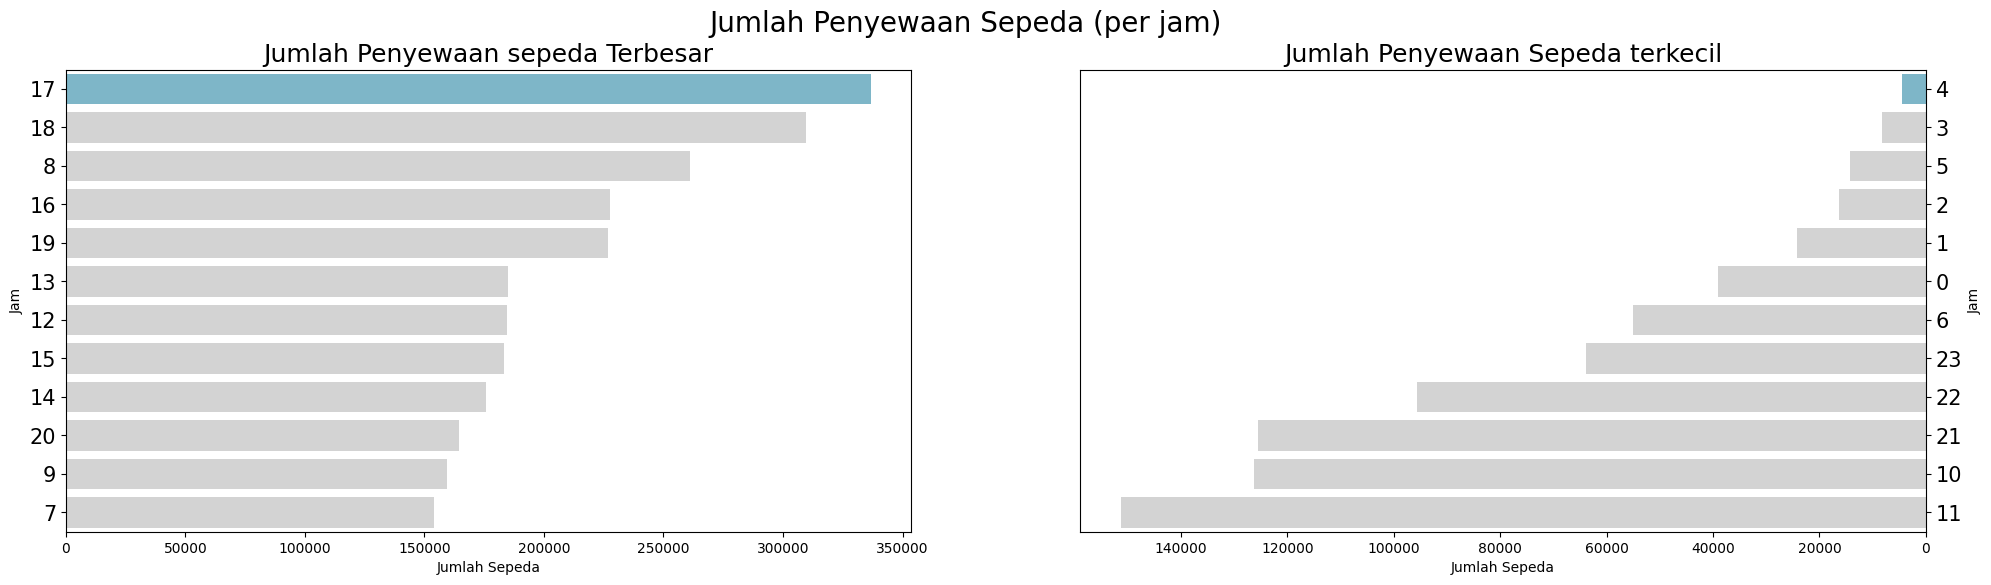

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="cnt", y="hr", data=hours1_df.head(12), orient='h', palette=colors, ax=ax[0])
ax[0].set_ylabel("Jam")
ax[0].set_xlabel("Jumlah Sepeda")
ax[0].set_title("Jumlah Penyewaan sepeda Terbesar", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="cnt", y="hr", data=hours1_df.sort_values(by="cnt",ascending=True).head(12), orient='h', palette=colors, ax=ax[1])
ax[1].set_ylabel("Jam")
ax[1].set_xlabel("Jumlah Sepeda")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Jumlah Penyewaan Sepeda terkecil", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Jumlah Penyewaan Sepeda (per jam)", fontsize=20)
plt.show()

Berdasarkan gambar di atas, dapat dilihat penyewaan sepeda terbanyak oleh pelanggan adalah pada jam 17.00 atau jam 5 sore, sedangkan penyewaan sepeda paling sedikit pleh pelanggan adalah pada pukul 4 pagi.

### Pertanyaan 3:

In [27]:
day_season = pd.DataFrame(day_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index())
day_season["season"] = day_season["season"].replace({1: 'Summer',
                                             2: 'Springer',
                                             3: 'Fall',
                                             4: 'Winter'})
day_season

,season,cnt
0,Fall,1061129
1,Springer,918589
2,Winter,841613
3,Summer,471348


<ipython-input-28-4dc913f02b3a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


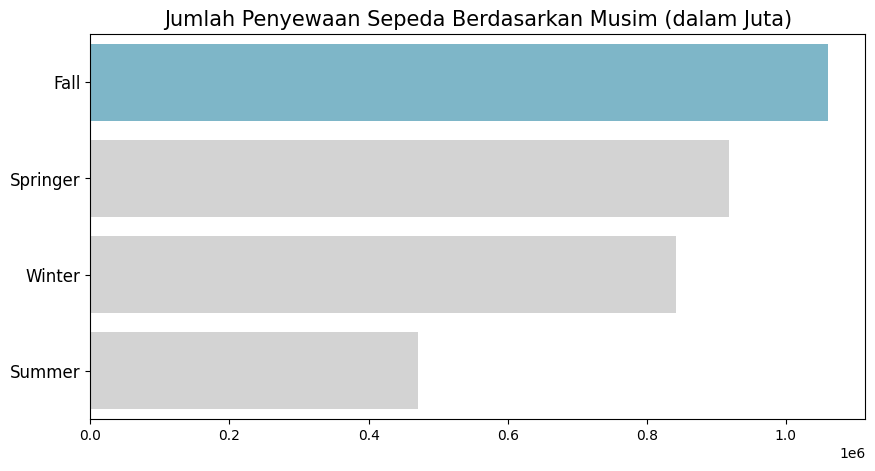

In [28]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="cnt",
    y="season",
    data=day_season,
    palette=colors_,
    orient='h',
    errorbar=None
)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim (dalam Juta)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan gambar di atas, diketahui bahwa kebanyakan pelanggan lebih suka menyewa sepeda ketika musim gugur (fall).

## Conclusion

- Berdasarkan gambar pada output dari pertanyaan 1 di atas, dapat diambil kesimpulan bahwa terdapat kenaikan yang signifikan dari bisnis penyewaan sepeda dari tahun 2011 ke tahun 2012, dan bisa dilihat juga dari kedua tahun tersebut terdapat kesamaan yaitu penyewaan sepeda mengalami kenaikan pada 4 bulan pertama dan mengalami penurunan pada 4 bulan terakhir. Hal ini bisa dipengaruhi oleh beberapa faktor, salah satunya adalah faktor perubahan musim yang mana musim selalu berganti setiap triwulan sekali.
- Berdasarkan gambar pada output dari pertanyaan 2 di atas, dapat diambil kesimpulan bahwa jumlah sepeda yang disewa paling banyak oleh pelanggan adalah pada pukul 17.00 (5 sore), sedangkan penyewaan sepeda paling sedikit oleh pelanggan adalah pada pukul 4 pagi.
-Berdasarkan gambar pada output dari pertanyaan 3 di atas, diketahui bahwa kebanyakan pelanggan paling banyak suka menyewa sepeda ketika musim gugur (fall) dan jumlah paling sedikit sepeda yang disewa ketika musim panas (summer).